In [1]:
import pandas as pd
import numpy as np
import os
from os.path import isfile, join

import matplotlib.pyplot as plt
%matplotlib inline

## Carregamento de textos

In [2]:
limited_news_path = r'Software\Fake.br-Corpus' #\fake_10 or \true_10
news_path = r'Software\Fake.br-Corpus\full_texts' #\fake or \true

paths = [limited_news_path, news_path]

In [20]:
print(sortDir(limited_news_path+'\\true-meta-information-10\\',is_meta=True))

['1-meta.txt', '2-meta.txt', '3-meta.txt', '4-meta.txt', '5-meta.txt', '6-meta.txt', '7-meta.txt', '8-meta.txt', '9-meta.txt', '10-meta.txt']


In [49]:
def sortDir(dir_path: str, is_meta=False) ->list:
    '''
    Ordena os arquivos dentro de dir_path e os retorna no formato de lista.
    '''
    if is_meta:
        number_separator = "-meta.txt"
    else:
        number_separator = ".txt"

    first_list = os.listdir(dir_path)
    int_list = [int(element.split(number_separator)[0]) for element in first_list]
    int_list.sort()
    final_list = [(str(element) + number_separator) for element in int_list]

    return final_list

def txtToDataframe(path, is_limited=True):
    '''Function for converting full texts to a single DataFrame.'''
    if is_limited:
        true_files = [path+"\\true_10\\"+f for f in sortDir(dir_path = path+'\\true_10') if isfile(join(path+'\\true_10', f))]
        fake_files = [path+"\\fake_10\\"+f for f in sortDir(dir_path = path+'\\fake_10') if isfile(join(path+'\\fake_10', f))]
    else:
        true_files = [path+"\\true\\"+f for f in sortDir(dir_path = path+'\\true') if isfile(join(path+'\\true', f))]
        fake_files = [path+"\\fake\\"+f for f in sortDir(dir_path = path+'\\fake') if isfile(join(path+'\\fake', f))]
    
    texts = []
    labels = []
    
    for file in true_files:
        with open(file, encoding='utf-8') as f:
            texts.append(f.read())
            labels.append('true')
    for file in fake_files:
        with open(file, encoding='utf-8') as f:
            texts.append(f.read())
            labels.append('fake')
            
    df = pd.DataFrame(list(zip(texts,labels)),columns=['texts','labels'])
    
    # Com esta função, textos e labels foram inseridos em um DataFrame de maneira sequencial. Todas as notícias verdadeiras vêm
    # ANTES do bloco de notícias falsas.
    
    return df

def appendMetadata(path,df, is_limited=True):
    '''Function for appending metadata to previously generated news DataFrame.'''
    if is_limited:
        true_meta = [path+"\\true-meta-information-10\\"+f for f in sortDir(dir_path = path+'\\true-meta-information-10',is_meta=True) if isfile(join(path+'\\true-meta-information-10', f))]
        fake_meta = [path+"\\fake-meta-information-10\\"+f for f in sortDir(dir_path = path+'\\fake-meta-information-10',is_meta=True) if isfile(join(path+'\\fake-meta-information-10', f))]
    else:
        true_meta = [path+"\\true-meta-information\\"+f for f in sortDir(dir_path = path+'\\true-meta-information',is_meta=True) if isfile(join(path+'\\true-meta-information', f))]
        fake_meta = [path+"\\fake-meta-information\\"+f for f in sortDir(dir_path = path+'\\fake-meta-information',is_meta=True) if isfile(join(path+'\\fake-meta-information', f))]
    

    #true_meta e fake_meta são listas com todas os paths para arquivos de metadata.
    
    columns = ["author", "source", "category", "date","tokens","words_without_punctuation","types","number_of_links","uppercase_words","verbs","subjuntive_imperative","nouns","adjectives","adverbs","modal_verbs","singular_first_and_second_personal_pronouns","plural_first_personal_pronouns","pronouns","pausality","characters","avg_sentence_length","avg_word_length","percentage_of_spelling_errors","emotiveness","diversity"]
    
    true_metadata = pd.DataFrame(columns=columns)
    fake_metadata = pd.DataFrame(columns=columns)
    
    for file in true_meta:
        #print(file)
        aux = pd.read_csv(file, header=None, sep = '\n').transpose()
        aux.columns = columns
        true_metadata=true_metadata.append(aux)
        
        
    for file in fake_meta:
        #print(file)
        aux = pd.read_csv(file, header=None, sep = '\n').transpose()
        aux.columns = columns
        fake_metadata=fake_metadata.append(aux)
        
    
    metadata = pd.DataFrame(columns=columns)
    metadata = metadata.append(true_metadata,ignore_index=True)
    metadata = metadata.append(fake_metadata,ignore_index=True) 


    complete_df = pd.concat([df,metadata],axis=1)
    # Este DataFrame possui todos os textos/labels (2 colunas) e metadata (25 colunas).
    
    return complete_df

In [50]:
ai = int(input('''0 - Base com 10 notícias verdadeiras e 10 notícias falsas
1 - Base completa de notícias
'''))

path = paths[ai]

if ai == 0:
    data = txtToDataframe(path) # Dataframe contendo notícias e labels.
    complete_data = appendMetadata(path,data) # Dataframe contendo notícias, labels e metadata.
else:
    data = txtToDataframe(path,is_limited=False)
    complete_data = appendMetadata(path,data,is_limited=False)

0 - Base com 10 notícias verdadeiras e 10 notícias falsas
1 - Base completa de notícias
1


In [60]:
true_test=sortDir(dir_path = path+'\\true-meta-information',is_meta=True)
fake_test=sortDir(dir_path = path+'\\fake-meta-information',is_meta=True)


In [62]:
true_dump = [item.split('-meta.txt')[0] for item in fake_test]
df = pd.DataFrame(true_dump)
df.to_csv('fake-dump.csv')
    

## Analisando Base de notícias

TypeError: 'value' must be an instance of str or bytes, not a float

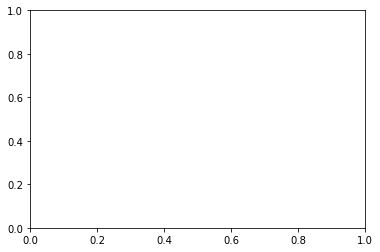

In [47]:
# Verificando assuntos

plt.hist(complete_data['characters'])